### Mối tương quan giữa các đặc trưng trong tập dữ liệu

Để xem xét các đặc trưng có sẵn trong tập dữ liệu, ta muốn xác định và phân tích mối quan hệ giữa chúng, đồng thời xác định những đặc trưng nào trong tập dữ liệu đóng góp đáng kể vào mục tiêu giải pháp. Chúng em sử dụng các phép tính và trực quan hóa để vẽ biểu đồ nhiệt về ma trận hệ số tương quan giữa các cột trong một tập dữ liệu.

#### Khai báo các thư viện cần thiết.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Đọc dữ liệu đã làm sạch ở phần Preprocessing.

In [2]:
file_name = './data/cleaned_air_quality_health_impact_data.csv'
cleaned_df = pd.read_csv(file_name)

#### Hiển thị 5 dòng đầu của dữ liệu. 

In [3]:
cleaned_df.head()

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


#### Vẽ biểu đồ nhiệt về ma trận hệ số tương quan giữa, làm tròn đến một chữ số.

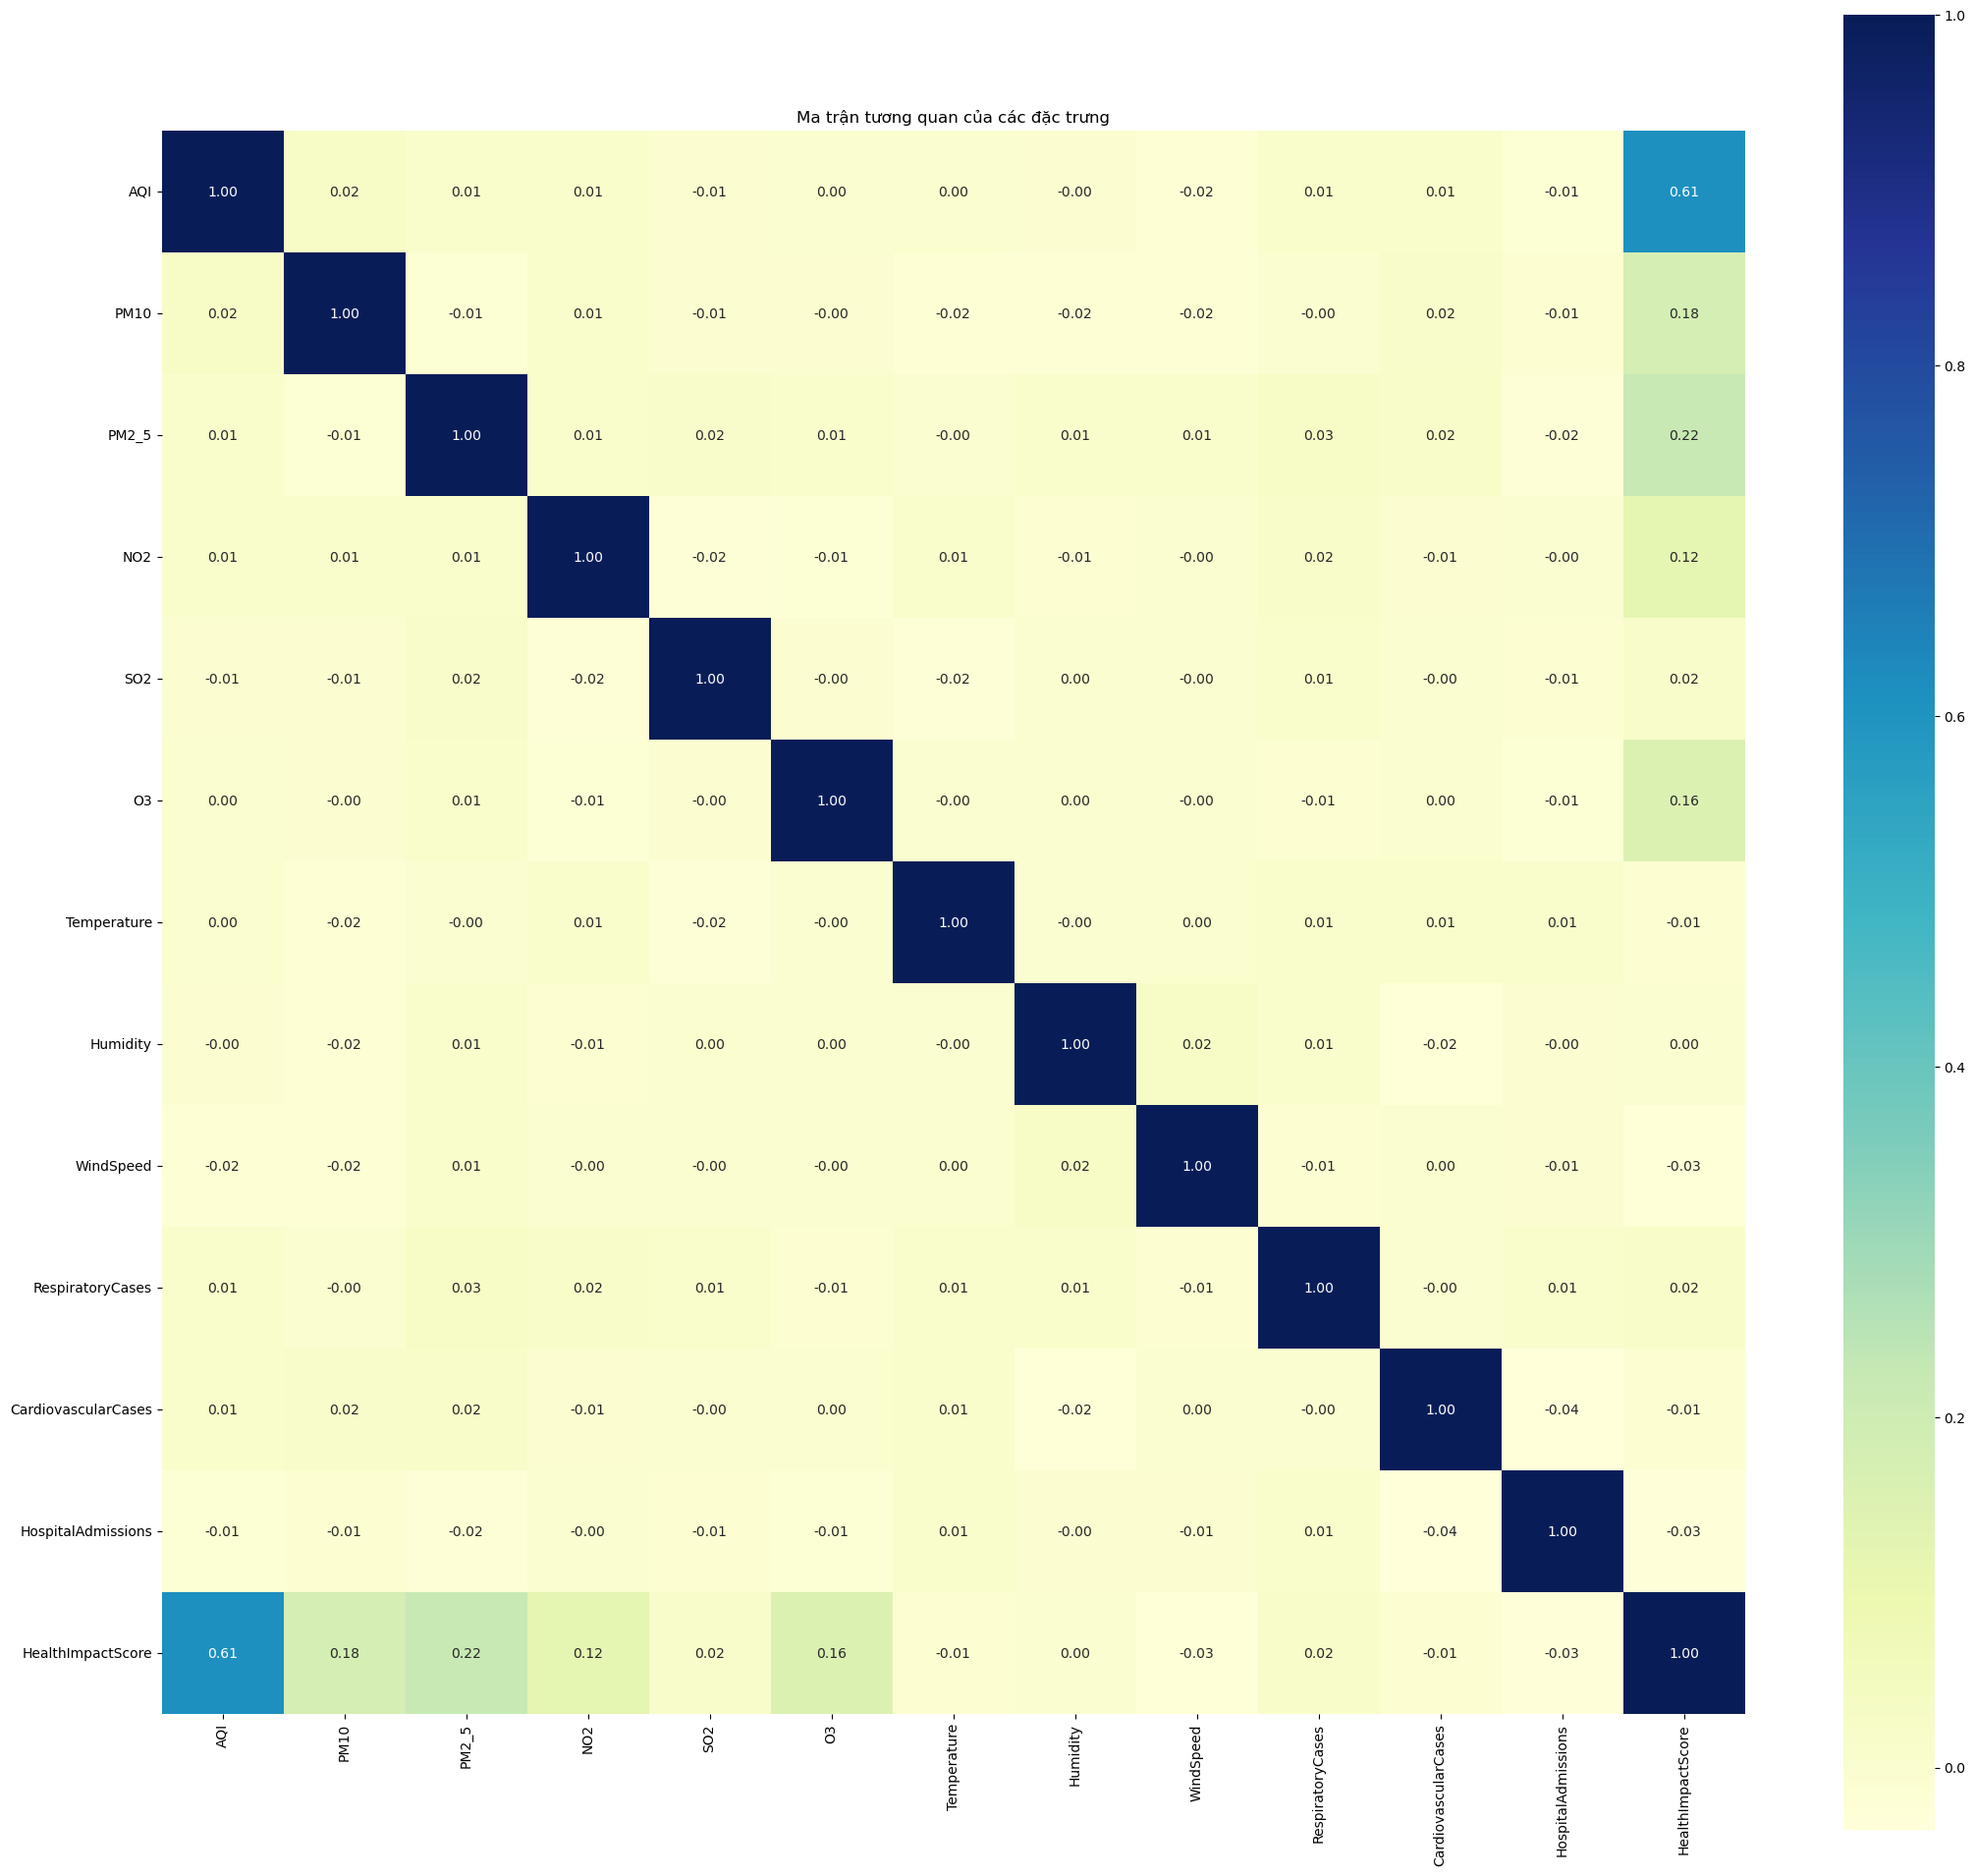

In [4]:
df = cleaned_df.drop(columns=['HealthImpactClass'])
correlation_matrix = df.corr()
plt.figure(figsize = (26, 24))
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = "YlGnBu", cbar = True, square = True)
plt.title('Ma trận tương quan của các đặc trưng')
plt.show()

#### Rút trích các cặp tương quan thuận, nghịch mạnh và tương quan yếu từ ma trận tương quan để đánh giá mức độ ảnh hưởng của từng biến đối với các yếu tố khác.

In [5]:
# Tương quan thuận mạnh (>= 0.99)
strong_positive = correlation_matrix[(correlation_matrix >= 0.99) & (correlation_matrix != 1.0)]
# Tương quan nghịch mạnh (<= -0.9)
strong_negative = correlation_matrix[correlation_matrix <= -0.99]
# tương quan yếu (-0.01 < và < 0.01 và khác 0)
weak_correlation = correlation_matrix[(correlation_matrix > -0.01) & (correlation_matrix < 0.01)]
# không tương quan ( = 0)
no_correlation = correlation_matrix[correlation_matrix == 0]

Các cặp tương quan thuận mạnh

In [6]:
strong_positive.notnull()

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore
AQI,False,False,False,False,False,False,False,False,False,False,False,False,False
PM10,False,False,False,False,False,False,False,False,False,False,False,False,False
PM2_5,False,False,False,False,False,False,False,False,False,False,False,False,False
NO2,False,False,False,False,False,False,False,False,False,False,False,False,False
SO2,False,False,False,False,False,False,False,False,False,False,False,False,False
O3,False,False,False,False,False,False,False,False,False,False,False,False,False
Temperature,False,False,False,False,False,False,False,False,False,False,False,False,False
Humidity,False,False,False,False,False,False,False,False,False,False,False,False,False
WindSpeed,False,False,False,False,False,False,False,False,False,False,False,False,False
RespiratoryCases,False,False,False,False,False,False,False,False,False,False,False,False,False


Nhận xét:
* Tương quan thuận mạnh (>= 0.99): Đây là các biến có sự liên kết rất chặt chẽ một cách tuyến tính, nhưng trong dữ liệu trên, không có mối quan hệ tương quan mạnh mẽ nào ở mức trên 0.99. Điều này có nghĩa là không có một biến nào được suy ra tuyến tính một cách hoàn toàn từ biến khác, cho thấy bộ dữ liệu rất tốt và không có cột nào trùng lặp. Ví dụ cụ thể: nếu bộ dữ liệu có cột chu vi và cột nửa chu vi, khi kiểm tra trùng lặp thì hai cột này có giá trị khác nhau, nhưng thực ra chúng đã trùng nhau vì chúng phụ thuộc tuyến tính nhau.

Các cặp tương quan nghịch mạnh

In [7]:
strong_negative.notnull()

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore
AQI,False,False,False,False,False,False,False,False,False,False,False,False,False
PM10,False,False,False,False,False,False,False,False,False,False,False,False,False
PM2_5,False,False,False,False,False,False,False,False,False,False,False,False,False
NO2,False,False,False,False,False,False,False,False,False,False,False,False,False
SO2,False,False,False,False,False,False,False,False,False,False,False,False,False
O3,False,False,False,False,False,False,False,False,False,False,False,False,False
Temperature,False,False,False,False,False,False,False,False,False,False,False,False,False
Humidity,False,False,False,False,False,False,False,False,False,False,False,False,False
WindSpeed,False,False,False,False,False,False,False,False,False,False,False,False,False
RespiratoryCases,False,False,False,False,False,False,False,False,False,False,False,False,False


Nhận xét:
* Tương quan nghịch mạnh (<= -0.99): không có mối quan hệ tương quan mạnh mẽ nào ở mức dưới -0.99. Điều này cũng có nghĩa là không có một biến nào được suy ra tuyến tính một cách hoàn toàn từ biến khác, cho thấy bộ dữ liệu rất tốt.

Các cặp tương quan yếu

In [8]:
weak_correlation.notnull()

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore
AQI,False,False,True,True,True,True,True,True,False,True,True,False,False
PM10,False,False,False,True,True,True,False,False,False,True,False,True,False
PM2_5,True,False,False,True,False,True,True,True,True,False,False,False,False
NO2,True,True,True,False,False,False,True,False,True,False,True,True,False
SO2,True,True,False,False,False,True,False,True,True,False,True,False,False
O3,True,True,True,False,True,False,True,True,True,False,True,False,False
Temperature,True,False,True,True,False,True,False,True,True,True,True,True,False
Humidity,True,False,True,False,True,True,True,False,False,True,False,True,True
WindSpeed,False,False,True,True,True,True,True,False,False,False,True,True,False
RespiratoryCases,True,True,False,False,False,False,True,True,False,False,True,True,False


Nhận xét:
* Các cặp dữ liệu này có tương quan nhưng tương quan rất yếu một cách tuyến tính. 

Các cặp không tương quan

In [9]:
no_correlation.notnull()

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore
AQI,False,False,False,False,False,False,False,False,False,False,False,False,False
PM10,False,False,False,False,False,False,False,False,False,False,False,False,False
PM2_5,False,False,False,False,False,False,False,False,False,False,False,False,False
NO2,False,False,False,False,False,False,False,False,False,False,False,False,False
SO2,False,False,False,False,False,False,False,False,False,False,False,False,False
O3,False,False,False,False,False,False,False,False,False,False,False,False,False
Temperature,False,False,False,False,False,False,False,False,False,False,False,False,False
Humidity,False,False,False,False,False,False,False,False,False,False,False,False,False
WindSpeed,False,False,False,False,False,False,False,False,False,False,False,False,False
RespiratoryCases,False,False,False,False,False,False,False,False,False,False,False,False,False


Nhận xét:
* Các biến không tương quan cung cấp thông tin độc lập hơn, giúp mô hình học được nhiều đặc điểm hơn mà không bị chồng chéo thông tin.

#### Chú ý vào các mối quan hệ đặc biệt hơn

Ta thấy được những mối quan hệ có tính tương quan cao nhất trong bộ dữ liệu là:
- HealthImpactScore và AQI
- HealthImpactScore và PM10
- HealthImpactScore và PM2_5
- HealthImpactScore và NO2
- HealthImpactScore và O3

Quá trình tiếp theo ta sẽ tập trung khai thác những câu hỏi quanh các yếu tố này.